In [112]:
import random
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [113]:
iris = datasets.load_iris()
features = iris.data 
target = iris.target

sepal_length = np.array(features[:, 0])
petal_width = np.array(features[:, 3])

species_names = list()

for i in target:
    if i == 0:
        species_names.append('setosa')
    elif i == 1:
        species_names.append('versicolor')
    else:
        species_names.append('virginica')

In [114]:
sgd_loss = pd.DataFrame(columns=['intercept', 'coefficient', 'loss'])
iterations = len(features)

def predict(intercept, coefficient, x):
    return intercept + coefficient * x

def sgd(x, y, iterations, alpha = 0.01):
    intercept, coefficient= 0.0, 0.0
    for i in range(iterations):
        rand = random.randint(0, len(x) - 1)
        prediction = predict(intercept, coefficient, x[rand])
        d0 = prediction - y[rand]
        d1 = (prediction - y[rand]) * x[rand]
        intercept = intercept - alpha * d0
        coefficient = coefficient - alpha * d1
        cost_function = (prediction - y[rand])**2 / 2
        sgd_loss.loc[i] = [intercept, coefficient, cost_function]
    return intercept, coefficient

sgd_intercept, sgd_coefficient = sgd(x = features[:, 0], y = features[:, 3], iterations = iterations)

Text(0.5, 1.0, 'SGD Loss Function Over Time')

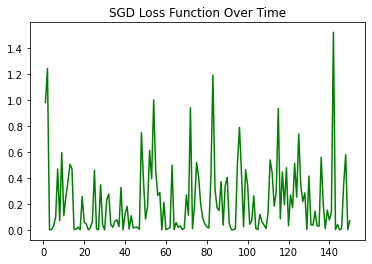

In [115]:
plt.plot(np.arange(1, iterations + 1), sgd_loss['loss'], color = 'g')
plt.title('SGD Loss Function Over Time')

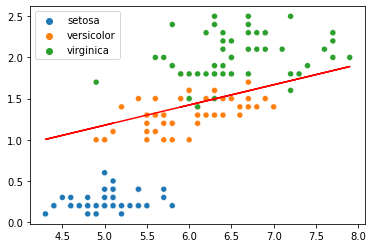

In [116]:
sns.scatterplot(
    x = sepal_length, 
    y = petal_width, 
    hue = species_names
)

plt.plot(
    sepal_length, 
    sgd_intercept + sgd_coefficient * sepal_length, 
    color = 'r'
)

In [117]:
sgd_predictions = [sgd_intercept + sgd_coefficient * x for x in sepal_length]

sgd_mse = mean_squared_error(
    sgd_predictions,
    petal_width
)

print(f"SGD's MSE is {sgd_mse}")

SGD's MSE is 0.400373253984775
